# Do the Hello World example on a 2-qubit Bell state

## Step 1: Map the problem to circuits and operators

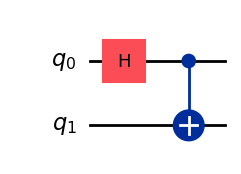

In [5]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0, 1)

qc.draw(output='mpl')

In [6]:
from qiskit.quantum_info import Pauli

ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')

observables = [ZZ, ZI, IZ, XX, XI, IX]

## Step 2: Optimize

## Step 3: Execute on the backend

In [8]:
from qiskit_aer.primitives import Estimator
estimator = Estimator()
job = estimator.run([qc] * len(observables), observables)
job.result()

EstimatorResult(values=array([1.        , 0.        , 0.        , 1.        , 0.00976562,
       0.00976562]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0048335, 'sample_measure_time': 0.0004879, 'input_qubit_map': [[0, 0], [1, 1]], 'max_memory_mb': 32473, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 16, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 1.0, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0048335, 'sample_measure_time': 0.0004879, 'input_qubit_map

## Step 4: Post-process (and plotting)

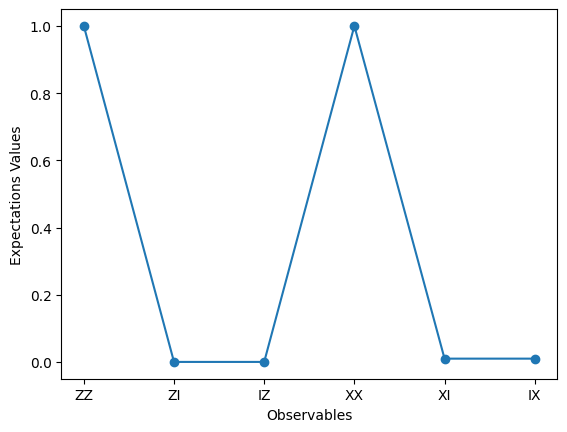

In [11]:
import matplotlib.pyplot as plt

data = ['ZZ', 'ZI', 'IZ', 'XX', 'XI', 'IX']
values = job.result().values
plt.plot(data, values, '-o')
plt.xlabel('Observables')
plt.ylabel('Expectations Values')
plt.show()